<h1>premier k-NN : Application _ Test De Personnalité</h1>

## Partie 1 : Base de données, Analyse, Prétraitement et Préparation

### Test De personnalité

Comment réagissez-vous sous la pression ?

In [158]:
%run Test.py

Question 1 :
Quelle importance accordez-vous au succès ?

(a)Une importance moyenne.
(b)Une très grande importance.
(c)Le succès ne me préoccupe pas beaucoup.
a

Question 2 :
Vous est-il déjà arrivé de prendre des jours de congé parce que vous étiez stressé(e) ?

(a)Une ou deux fois.
(b)Plus de deux fois.
(c)Jamais.
a

Question 3 :
Vous considère-t-on comme une personne sachant conserver son sang froid en période de crise ?

(a)Parfois, mais ceux qui arrivent à garder la tête froide en période de crise n’ont généralement pas saisi la gravité de la situation.
(b)Pas vraiment.
(c)Oui, je pense être à juste titre perçu(e) ainsi.
a

Question 4 :
Parmi les propositions suivantes, laquelle est la plus à même de vous détendre et de réduire votre stress après une journée particulièrement éprouvante ?

(a)Quelques heures de sommeil dans ma chaise longue préférée.
(b)Une bonne rasade de whiskey ou d’un autre alcool.
(c)Une barre chocolatée.
a

Question 5 :
Les délais vous stimulent-ils ?

(a)Non

Fusionner les fichiers réponses

In [30]:
%run data.py

Importer les bibliothèques

In [1]:
import pandas as pd
import numpy as np

Importer la dataset

In [2]:
path='./Dataset/combined_csv.csv'
df = pd.read_csv(path)
df.head(50)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Score,Interpretation
0,a,a,a,a,a,1,1,1,1,1,10,B
1,b,b,b,b,b,2,2,2,2,2,0,C
2,c,c,c,c,c,3,3,3,3,3,20,A
3,a,b,c,a,b,1,2,3,1,2,8,C
4,b,c,a,c,a,3,2,3,1,2,11,B
5,c,b,a,c,b,2,3,1,3,2,10,B
6,g,z,ju,d,u,4,7,2,3,1,3,C
7,j,f,d,t,u,2,6,3,1,3,5,C
8,a,d,c,b,a,2,3,7,1,3,9,C
9,a,b,c,e,d,2,3,2,1,3,8,C


In [3]:
df.shape

(215, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Q1              207 non-null    object
 1   Q2              203 non-null    object
 2   Q3              202 non-null    object
 3   Q4              206 non-null    object
 4   Q5              201 non-null    object
 5   Q6              203 non-null    object
 6   Q7              205 non-null    object
 7   Q8              203 non-null    object
 8   Q9              205 non-null    object
 9   Q10             207 non-null    object
 10  Score           215 non-null    int64 
 11  Interpretation  215 non-null    object
dtypes: int64(1), object(11)
memory usage: 20.3+ KB


In [5]:
listena = df.columns[df.isnull().any()]
listena

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10'], dtype='object')

In [6]:
list_abc = ['Q1', 'Q2', 'Q3', 'Q4']
list_ab = ['Q5']
list_123 = ['Q6', 'Q7', 'Q8', 'Q9', 'Q10']

Préparer la DataSet en utilisant Numpy et Pandas

*=> Pour le nettoyage :*
- *Je remplace toutes les valeurs qui ne sont a, b, c, 1, 2, 3, 1.0, 2.0, 3.0 dans les colonnes correspondantes (cf. au-dessus)*
- *Les autres valeurs qui ne sont pas pris en compte, comme les A, B, C, etc ... ne sont pas compabilisé dans le score, donc remplacer en NAN*
- *Si je supprime les lignes NAN, je supprime la moitié de mon data*
- *Je remplace les NaN par la valeur 0, vu qu'elle ne change pas le scrore, et donc l'interprétation.*

In [7]:
#pour transformer toutes les autres valeurs que a, b ou c en NaN :
df[list_abc] = df[list_abc][df.isin(["a","b","c"])]
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Score,Interpretation
0,a,a,a,a,a,1,1,1,1,1,10,B
1,b,b,b,b,b,2,2,2,2,2,0,C
2,c,c,c,c,c,3,3,3,3,3,20,A
3,a,b,c,a,b,1,2,3,1,2,8,C
4,b,c,a,c,a,3,2,3,1,2,11,B
...,...,...,...,...,...,...,...,...,...,...,...,...
210,c,c,NaN,c,c,NaN,NaN,3.0,3,3,14,B
211,b,a,c,NaN,b,NaN,2.0,NaN,3,2,5,C
212,a,c,b,NaN,NaN,1.0,NaN,3.0,2,3,8,C
213,a,NaN,NaN,a,b,v,t,Y,',1,3,C


In [8]:
# Transformer toutes les autres valeurs que a et b en NaN :
df[list_ab] = df[list_ab][df.isin(["a","b"])]
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Score,Interpretation
0,a,a,a,a,a,1,1,1,1,1,10,B
1,b,b,b,b,b,2,2,2,2,2,0,C
2,c,c,c,c,NaN,3,3,3,3,3,20,A
3,a,b,c,a,b,1,2,3,1,2,8,C
4,b,c,a,c,a,3,2,3,1,2,11,B
...,...,...,...,...,...,...,...,...,...,...,...,...
210,c,c,NaN,c,NaN,NaN,NaN,3.0,3,3,14,B
211,b,a,c,NaN,b,NaN,2.0,NaN,3,2,5,C
212,a,c,b,NaN,NaN,1.0,NaN,3.0,2,3,8,C
213,a,NaN,NaN,a,b,v,t,Y,',1,3,C


In [9]:
# Transformer toutes les autres valeurs 1, 2 ou 3 (int. ou float) en NaN :
df[list_123] = df[list_123][df.isin(["1","2","3","1.0","2.0","3.0"])]
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Score,Interpretation
0,a,a,a,a,a,1,1,1,1,1,10,B
1,b,b,b,b,b,2,2,2,2,2,0,C
2,c,c,c,c,NaN,3,3,3,3,3,20,A
3,a,b,c,a,b,1,2,3,1,2,8,C
4,b,c,a,c,a,3,2,3,1,2,11,B
...,...,...,...,...,...,...,...,...,...,...,...,...
210,c,c,NaN,c,NaN,NaN,NaN,3.0,3,3,14,B
211,b,a,c,NaN,b,NaN,2.0,NaN,3,2,5,C
212,a,c,b,NaN,NaN,1.0,NaN,3.0,2,3,8,C
213,a,NaN,NaN,a,b,NaN,NaN,NaN,NaN,1,3,C


In [10]:
# remplacer les valeurs a,b,c,1,2,3,1.0,2.0,3.0, avec  :
df[listena]= df[listena].replace(["a","1","1.0"],1).replace(["b","2","2.0"],0).replace(["c","3","3.0"],2,)
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Score,Interpretation
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10,B
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,C
2,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,20,A
3,1.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,8,C
4,0.0,2.0,1.0,2.0,1.0,2.0,0.0,2.0,1.0,0.0,11,B
...,...,...,...,...,...,...,...,...,...,...,...,...
210,2.0,2.0,NaN,2.0,NaN,NaN,NaN,2.0,2.0,2.0,14,B
211,0.0,1.0,2.0,NaN,0.0,NaN,0.0,NaN,2.0,0.0,5,C
212,1.0,2.0,0.0,NaN,NaN,1.0,NaN,2.0,0.0,2.0,8,C
213,1.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,1.0,3,C


Je remplace les valeurs NaN par 0, pour ne pas influencer les résultats du score donc de l'interprétation

In [11]:
df[listena] = df[listena].fillna(0)
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Score,Interpretation
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10,B
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,C
2,2.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,20,A
3,1.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,8,C
4,0.0,2.0,1.0,2.0,1.0,2.0,0.0,2.0,1.0,0.0,11,B
...,...,...,...,...,...,...,...,...,...,...,...,...
210,2.0,2.0,0.0,2.0,0.0,0.0,0.0,2.0,2.0,2.0,14,B
211,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,5,C
212,1.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,8,C
213,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3,C


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Q1              215 non-null    float64
 1   Q2              215 non-null    float64
 2   Q3              215 non-null    float64
 3   Q4              215 non-null    float64
 4   Q5              215 non-null    float64
 5   Q6              215 non-null    float64
 6   Q7              215 non-null    float64
 7   Q8              215 non-null    float64
 8   Q9              215 non-null    float64
 9   Q10             215 non-null    float64
 10  Score           215 non-null    int64  
 11  Interpretation  215 non-null    object 
dtypes: float64(10), int64(1), object(1)
memory usage: 20.3+ KB


Séparation des features et des labels

In [13]:
y = df.select_dtypes('object').copy()
y

,Interpretation
0,B
1,C
2,A
3,C
4,B
...,...
210,B
211,C
212,C
213,C


In [14]:
X = df.drop(["Score","Interpretation"], axis = 1)
X

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0
3,1.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0
4,0.0,2.0,1.0,2.0,1.0,2.0,0.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
210,2.0,2.0,0.0,2.0,0.0,0.0,0.0,2.0,2.0,2.0
211,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
212,1.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0
213,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [15]:
X.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0
3,1.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0
4,0.0,2.0,1.0,2.0,1.0,2.0,0.0,2.0,1.0,0.0


## Partie 2 : Développement et entraînement d’un modèle KNN

La technique de classification KNN est considérée comme la technique la plus simple pour appliquer la classification supervisée, tout simplement, une nouvelle donnée de test sera classée comme la majorité de ses voisins (la distance la plus proche). À la suite de votre recherche sur le principe de KNN, nous développons notre modèle KNN. Pour cela :

In [16]:
# Séparation du jeu de donnée
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((172, 10), (43, 10), (172, 1), (43, 1))

### KNN From Scratch

- Préparez une fonction permettant de calculer les 3 différentes distances : Euclidean, Manhattan et Minkowski, (def distance(metric=’ Euclidean’, **kargs)).

In [17]:
D_T = X_test.iloc[0,:]
D_A = X_train.iloc[0,:]
Distance_eucli = np.sqrt(np.sum((D_T - D_A)**2))

Distance : $(\sum_{i=1}^{n} |x_i - y_i|^p)^\frac{1}{p}$

In [18]:
#KNN from scratch : 
def distance(Data_1, Data_2, metric='euclidean', **kargs):
    
    if kargs.items():
        
        for key,value in kargs.items():
            if key == 'p' :
                p = value
    else :
        p = 3
    
    if metric == 'euclidean' :
        Dis = np.sqrt(np.sum((Data_1-Data_2)**2))
    elif metric == 'manhattan' :
        Dis = np.abs(np.sum(Data_1-Data_2))
    elif metric == 'minkowski':
            Dis = (np.sum(np.abs(Data_1-Data_2))**p)**(1/p)
    return Dis

In [19]:
distance(X_test.iloc[0,:], X_train.iloc[0,:], metric='euclidean')

2.23606797749979

In [20]:
distance(X_test.iloc[0,:], X_train.iloc[0,:], metric='minkowski', p=4)

5.0

- Codez l’algorithme de KNN sous forme une fonction (def KNN(Data_Test, Data_Train, Label_Train, k=1, **kargs)) qui :
   
- Calcul la distance entre Data de test et Data d’apprentissage.
- Trouve la/les distances plus proche de « k » voisins.
- Classe Data de test selon la classe majoritaire de « k » voisins.

In [21]:
k = 3
metric = 'manhattan'

def knn(X_test, X_train, y_train, k, metric) :

    # pour tous les points du test avec le train
    Resultat = []
    for j in range(0,len(X_test)):

        D_T = X_test.iloc[j,:]
        
        # Distance pour 1 point du test avec le jeu train
        Distance = []
        for i in range(0,len(X_train)):
            D_A = X_train.iloc[i,:]

            #Dis = np.sqrt(np.sum((D_T-D_A)**2))

            Dis = distance(D_T, D_A, metric=metric)
            Distance.append(Dis)

        SS = np.sort(Distance) #ressot les dist en ordre croissant
        S = np.argsort(Distance) #ressort les index en ordre croissant

        index_petite_distance = S[:k]
        Pred = y_train.iloc[index_petite_distance]
        #print(Pred)
        
        # sort la somme de chaque résultat par point : nb de A, de B et de C
        Pred = [np.sum((Pred == 'A').astype(int)), 
                np.sum((Pred == 'B').astype(int)), 
                np.sum((Pred == 'C').astype(int))]
        #print("somme A, B et C :",Pred)
        
        # sort l'index de l'argument le plus utilisé, si A, B, C, ac résult 0, 1, 2
        Pred = np.argmax(Pred)
        #print("Argument max =",Pred)
        
        # Résultat du voisin le plus proche par point, donc suivant l'index, si A, b, ou C
        if Pred == 0:
            P = 'A'
        elif Pred == 1 :
            P = 'B' 
        else : P = 'C'

        Resultat.append(P)

    return Resultat


knn_pred = knn(X_test, X_train, y_train, k, metric)
knn_pred

['C',
 'B',
 'C',
 'B',
 'C',
 'C',
 'B',
 'C',
 'B',
 'B',
 'B',
 'B',
 'C',
 'C',
 'B',
 'C',
 'B',
 'C',
 'C',
 'A',
 'B',
 'C',
 'C',
 'B',
 'B',
 'C',
 'B',
 'C',
 'B',
 'C',
 'C',
 'C',
 'C',
 'B',
 'C',
 'B',
 'C',
 'C',
 'B',
 'C',
 'C',
 'A',
 'C']

In [22]:
len(knn_pred)

43

In [23]:
knn_pred[1]

'B'

- Réalisez des expérimentations en variant la distance et le nombre de « k ».
- Calculez les performances (exemple : Acc) et tracez la courbe de performance de chaque expérimentation. (Les résultats avec interprétation/argumentation doivent figurer dans le notebook comme dans le compte rendu).

In [24]:
from sklearn.metrics import confusion_matrix
def accuracie(y_test, knn_pred):
# Confusion Matrix
    matrice_confusion = confusion_matrix(y_test, knn_pred)
    # Je récupère les TP et TN 
    TP_A = matrice_confusion[0,0]
    TP_TN_B = matrice_confusion[1,1]
    TN_C = matrice_confusion[2,2]
    # Calcul de l'accuracy
    Accuracy = (TP_A + TP_TN_B + TN_C)/np.sum(matrice_confusion)
    return Accuracy

In [25]:
import matplotlib.pyplot as plt

k max =  1 , accuracie max =  0.9767441860465116


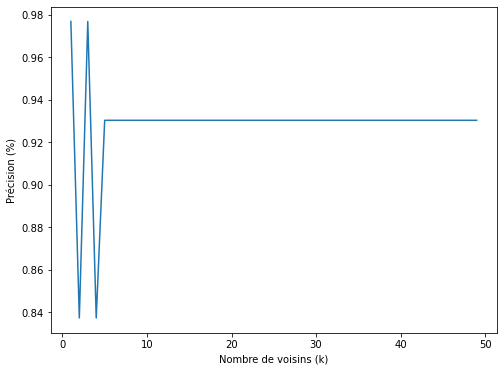

In [27]:
# Calculer la précision avec la variation du nombre de voisins choisis
metric = 'manhattan'
accuracies = []
# Pour k allant de 1 à 50 voisins
for k in range(1,50):
    # Calculer les prédictions
    knn_pred = knn(X_test, X_train, y_train, k, metric)
    # Caluler la précision des prédictions
    accuracy = accuracie(y_test, knn_pred)
    accuracies.append(accuracy)

# k max
accuracy_max = np.max(accuracies)
k_maxrange = range(1,50)[np.argmax(accuracies)]
print("k max = ",k_maxrange,", accuracie max = ", accuracy_max)

#schéma
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,50), accuracies)
ax.set_xlabel('Nombre de voisins (k)')
ax.set_ylabel('Précision (%)')
plt.show()

k max =  25 , accuracie max =  0.8604651162790697


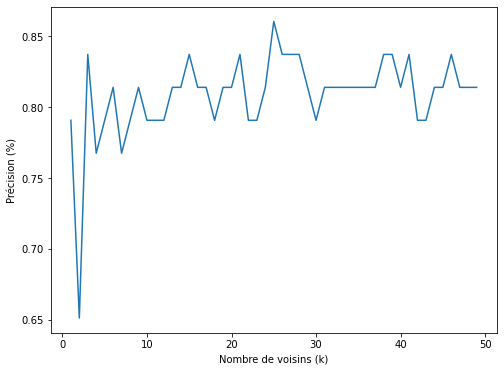

In [28]:
# Calculer la précision avec la variation du nombre de voisins choisis
metric = 'euclidean'
accuracies = []
# Pour k allant de 1 à 50 voisins
for k in range(1,50):
    # Calculer les prédictions
    knn_pred = knn(X_test, X_train, y_train, k, metric)
    # Caluler la précision des prédictions
    accuracy = accuracie(y_test, knn_pred)
    accuracies.append(accuracy)

# k max
accuracy_max = np.max(accuracies)
k_maxrange = range(1,50)[np.argmax(accuracies)]
print("k max = ",k_maxrange,", accuracie max = ", accuracy_max)

#schéma
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,50), accuracies)
ax.set_xlabel('Nombre de voisins (k)')
ax.set_ylabel('Précision (%)')
plt.show()

k max =  3 , accuracie max =  0.8372093023255814


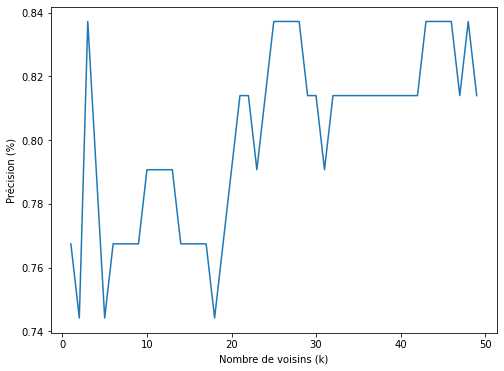

In [29]:
# Calculer la précision avec la variation du nombre de voisins choisis
metric = 'minkowski'
accuracies = []
# Pour k allant de 1 à 50 voisins
for k in range(1,50):
    # Calculer les prédictions
    knn_pred = knn(X_test, X_train, y_train, k, metric)
    # Caluler la précision des prédictions
    accuracy = accuracie(y_test, knn_pred)
    accuracies.append(accuracy)

# k max
accuracy_max = np.max(accuracies)
k_maxrange = range(1,50)[np.argmax(accuracies)]
print("k max = ",k_maxrange,", accuracie max = ", accuracy_max)

#schéma
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,50), accuracies)
ax.set_xlabel('Nombre de voisins (k)')
ax.set_ylabel('Précision (%)')
plt.show()

La distance Euclidienne suivi de Minkowski semble obtenir de meilleur résultats

la distance euclidienne montre des résultats plus stables et moins disparates de Minkowski

### KNN Sklearn

La bibliothèque Sklearn propose un panel des techniques de classification, y compris le KNN.

- Dans cette étape, vous êtes orientés vers la classe « sklearn.neighbors » pour maitriser les paramètres et les options possibles.

In [30]:
from sklearn.neighbors import KNeighborsClassifier
model_kNN = KNeighborsClassifier(n_neighbors=10, algorithm='brute')

In [31]:
# j'adapte le modèle aux données d'apprentissage
model_kNN.fit(X_train, y_train)

<ipython-input-31-f841533ad710>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model_kNN.fit(X_train, y_train)


KNeighborsClassifier(algorithm='brute', n_neighbors=10)

In [32]:
# prédiction
predictions = model_kNN.predict(X_test)
predictions

array(['C', 'B', 'C', 'B', 'C', 'C', 'B', 'C', 'C', 'C', 'B', 'B', 'B',
       'C', 'B', 'C', 'B', 'C', 'C', 'B', 'B', 'C', 'C', 'B', 'B', 'B',
       'B', 'B', 'B', 'C', 'C', 'B', 'C', 'B', 'C', 'B', 'C', 'C', 'C',
       'C', 'C', 'B', 'C'], dtype=object)

In [33]:
# calcul de mesure de la performance, yc l'accuracie
score = model_kNN.score(X_test, y_test)
score

0.7674418604651163

- Vous êtes censés à préparer un modèle performant pour notre application tout en respectant les consignes de la conception d’un modèle IA (Data préparée, K-fold validation, hyperparamètre, Gridsearch). (N’oubliez pas de présenter une comparaison entre KNN From Scratch et KNN Sklearn dans le compte rendu).


### 1) K-Fold
=> ici je récupère mon X et y train sur lequel je vais faire ma validation croisée

In [34]:
X_train.shape, y_train.shape

((172, 10), (172, 1))

In [35]:
df_train = pd.concat([X_train, y_train], axis=1)
df_train

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Interpretation
16,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,2.0,C
135,0.0,2.0,1.0,2.0,0.0,2.0,0.0,1.0,1.0,0.0,C
122,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,C
22,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,B
80,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,C
...,...,...,...,...,...,...,...,...,...,...,...
67,2.0,2.0,0.0,0.0,1.0,2.0,2.0,0.0,1.0,2.0,B
192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,C
117,1.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,0.0,1.0,C
47,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,2.0,C


In [36]:
X = df_train.iloc[:,:10]
y = df_train.iloc[:,10]
X.iloc[58,:]

Q1     1.0
Q2     2.0
Q3     2.0
Q4     2.0
Q5     1.0
Q6     1.0
Q7     0.0
Q8     0.0
Q9     1.0
Q10    0.0
Name: 200, dtype: float64

In [37]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score

# !!!! sur le X_train pas sur le df !!!!!
kf = KFold(n_splits=5)
kf.get_n_splits(X)
for train_index, test_index in kf.split(X):
    #print(train_index, test_index)
    X_Train = X.iloc[train_index,:]
    Y_Train = y.iloc[train_index]
    
    X_Test = X.iloc[test_index,:]
    Y_Test = y.iloc[test_index]
    
    model = KNN(n_neighbors = 10)
    model.fit(X_Train,Y_Train)
    y_pred = model.predict(X_Test)
    P = accuracy_score(Y_Test, y_pred)
    
    print("Performance:", P)
    

Performance: 0.9428571428571428
Performance: 0.8571428571428571
Performance: 0.7647058823529411
Performance: 0.8823529411764706
Performance: 0.7647058823529411


In [38]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score

num_folds = np.arange(2,30)
S_moy_perf = []

for fold in num_folds:
    kf = KFold(n_splits=fold)  
    kf.get_n_splits(X)
    for train_index, test_index in kf.split(X):
        #print(train_index, test_index)
        X_Train = X.iloc[train_index,:]
        Y_Train = y.iloc[train_index]

        X_Test = X.iloc[test_index,:]
        Y_Test = y.iloc[test_index]

        model = KNN(n_neighbors = 10)
        model.fit(X_Train,Y_Train)
        y_pred = model.predict(X_Test)
        P = accuracy_score(Y_Test, y_pred)
        moyenne_perf = P.mean()
    S_moy_perf.append(moyenne_perf)
        
perf_max = np.max(S_moy_perf)
fold_maxrange = range(2,30)[np.argmax(S_moy_perf)]
print("fold max = ",fold_maxrange,", accuracie max = ", perf_max)

fold max =  16 , accuracie max =  1.0


=> il a de bonne prediction, nous pouvons en déduire que le modèle est plutôt performant.

### 2) GridSearch

#### 2.1) Réglage des hyperparamètres
A partir d'ici, nous allos régler les paramètres pour l'application du GridSearch. Il va donc falloir régler les hyperparamètres que nous voulons, c'est-à-dire le nombre de "K" ainsi que la distance. On va avoir en sortie les meilleurs paramtètres.

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score

In [40]:
parametres = { 'n_neighbors' : np.arange(1,30),
               'metric' : ['minkowski','euclidean','manhattan'],
                  'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [41]:
model = KNN()

In [42]:
#gs = GridSearchCV(model, grid_parametres, verbose=1, cv=5)

In [43]:
gridS = GridSearchCV(KNN(), parametres, cv=5, scoring='accuracy', return_train_score=False,verbose=1)
grid_search = gridS.fit(X_train, y_train)

Fitting 5 folds for each of 348 candidates, totalling 1740 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConvers

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=1)]: Done 1740 out of 1740 | elapsed:   23.7s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [44]:
# voir les meilleurs paramètres
grid_search.best_params_

{'algorithm': 'ball_tree', 'metric': 'minkowski', 'n_neighbors': 28}

In [45]:
# visualiser l'accuracy 
accuracy = grid_search.best_score_ 
accuracy

0.9011764705882352

On retient donc qu'il faut utiliser la distance Minkowski ainsi qu'un nombre de K égal à 28.

#### 2.2) Phase de calcul

In [46]:
best_model_knn = KNN(n_neighbors = 28,metric = 'minkowski', algorithm = 'ball_tree')
best_model_knn.fit(X_train, y_train)

<ipython-input-46-c260ff4b699e>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  best_model_knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='ball_tree', n_neighbors=28)

In [47]:
best_y_pred = best_model_knn.predict(X_test)

In [48]:
best_score = best_model_knn.score(X_test, y_test)
best_score

0.8372093023255814

#### 2.3) Matrice de confusion

Précision du modèle :  0.8372093023255814

Matrice de confusion : 
 [[ 0  3  0]
 [ 0 13  3]
 [ 0  1 23]]

Report : 
               precision    recall  f1-score   support

           A       0.00      0.00      0.00         3
           B       0.76      0.81      0.79        16
           C       0.88      0.96      0.92        24

    accuracy                           0.84        43
   macro avg       0.55      0.59      0.57        43
weighted avg       0.78      0.84      0.81        43



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


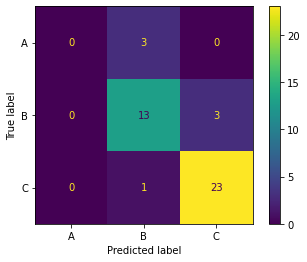

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('Précision du modèle : ', accuracy_score(y_test, best_y_pred))
print('\nMatrice de confusion : \n', confusion_matrix(y_test, best_y_pred))
print('\nReport : \n', classification_report(y_test, best_y_pred))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(best_model_knn, X_test, y_test)

Le modèle ne s'est pas beaucoup trompé pour les réponses B et C, ce qui indique une bonne précision.
Cependant, peut de résultat sur le A, 

## Partie 3 : Mettre en place la solution dans l’application de test de personnalité

Utilisez la fonction « joblib » pour enregistrer votre modèle, une fois vous avez préparé votre meilleur modèle de classification Faites intégrer cette solution à l’Application

In [50]:
import joblib

filename = 'KNN_Final'
joblib.dump(best_model_knn, filename)
nom_du_modele = joblib.load(filename)

Test de Personnalité et adapter l’application pour comparer le résultat avec et sans IA.

In [52]:
%run Test_knn.py

Question 1 :
Quelle importance accordez-vous au succès ?

(a)Une importance moyenne.
(b)Une très grande importance.
(c)Le succès ne me préoccupe pas beaucoup.
a

Question 2 :
Vous est-il déjà arrivé de prendre des jours de congé parce que vous étiez stressé(e) ?

(a)Une ou deux fois.
(b)Plus de deux fois.
(c)Jamais.
b

Question 3 :
Vous considère-t-on comme une personne sachant conserver son sang froid en période de crise ?

(a)Parfois, mais ceux qui arrivent à garder la tête froide en période de crise n’ont généralement pas saisi la gravité de la situation.
(b)Pas vraiment.
(c)Oui, je pense être à juste titre perçu(e) ainsi.
c

Question 4 :
Parmi les propositions suivantes, laquelle est la plus à même de vous détendre et de réduire votre stress après une journée particulièrement éprouvante ?

(a)Quelques heures de sommeil dans ma chaise longue préférée.
(b)Une bonne rasade de whiskey ou d’un autre alcool.
(c)Une barre chocolatée.
c

Question 5 :
Les délais vous stimulent-ils ?

(a)Non